In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

### Reading the data

In [61]:
df = pd.read_csv("data.csv")

In [62]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [64]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Dealing with null values

In [65]:
df.isnull().values.any()

True

In [66]:
count_nan_in_df = df.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_df))

Count of NaN: 314


In [67]:
count_nan_in_df = df.isnull().sum()
print (count_nan_in_df)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [68]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

### Dealing with unique columns

In [69]:
df.duplicated().any()

False

In [70]:
len(df["CUST_ID"].unique()) #no need for cust id since all of them are unique

8950

In [71]:
df.drop(columns=['CUST_ID'],inplace = True)

### Visualizations

<AxesSubplot: >

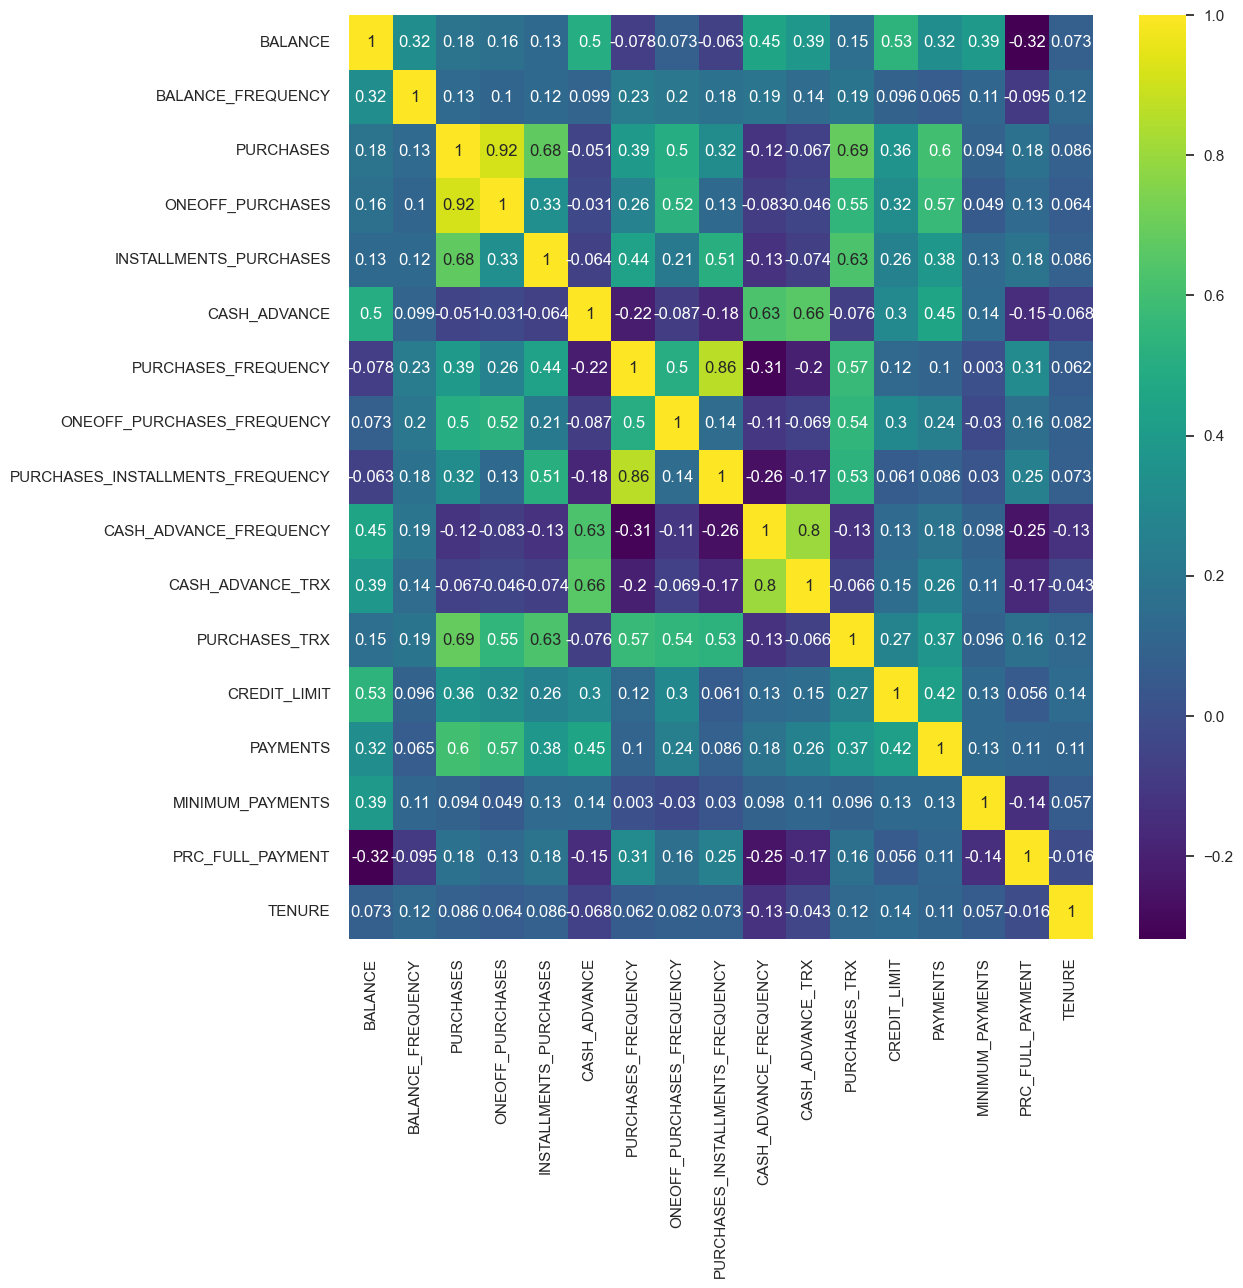

In [72]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

<AxesSubplot: xlabel='BALANCE_FREQUENCY', ylabel='Count'>

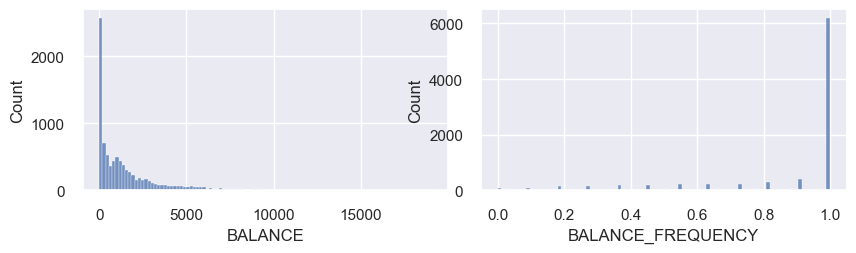

In [73]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = df,x = "BALANCE",ax=ax1)
sns.histplot(data = df,x = "BALANCE_FREQUENCY",ax=ax2)

<AxesSubplot: xlabel='PURCHASES_FREQUENCY', ylabel='Count'>

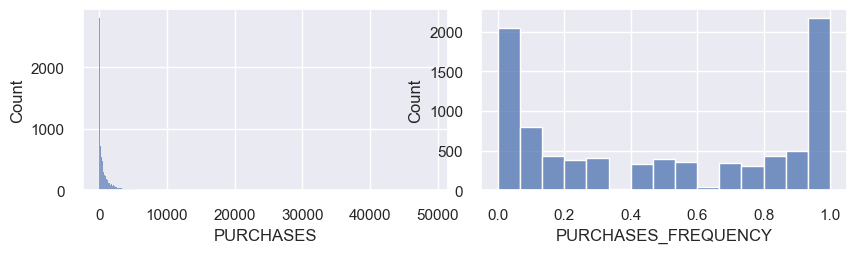

In [74]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = df,x = "PURCHASES",ax=ax1)
sns.histplot(data = df,x = "PURCHASES_FREQUENCY",ax=ax2)

<AxesSubplot: xlabel='ONEOFF_PURCHASES_FREQUENCY', ylabel='Count'>

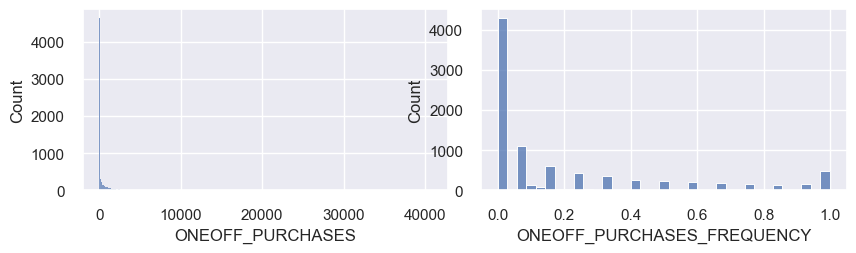

In [75]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = df,x = "ONEOFF_PURCHASES",ax=ax1)
sns.histplot(data = df,x = "ONEOFF_PURCHASES_FREQUENCY",ax=ax2)

<AxesSubplot: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='Count'>

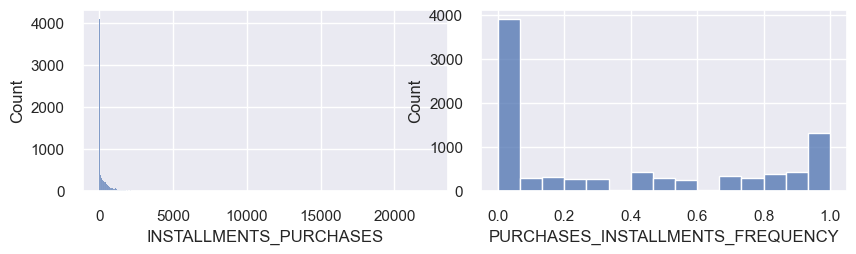

In [76]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = df,x = "INSTALLMENTS_PURCHASES",ax=ax1)
sns.histplot(data = df,x = "PURCHASES_INSTALLMENTS_FREQUENCY",ax=ax2)

<AxesSubplot: xlabel='CASH_ADVANCE_FREQUENCY', ylabel='Count'>

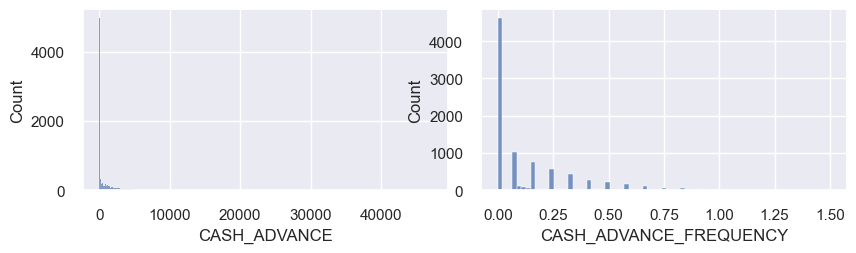

In [77]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = df,x = "CASH_ADVANCE",ax=ax1)
sns.histplot(data = df,x = "CASH_ADVANCE_FREQUENCY",ax=ax2)

<AxesSubplot: xlabel='CASH_ADVANCE_TRX', ylabel='Count'>

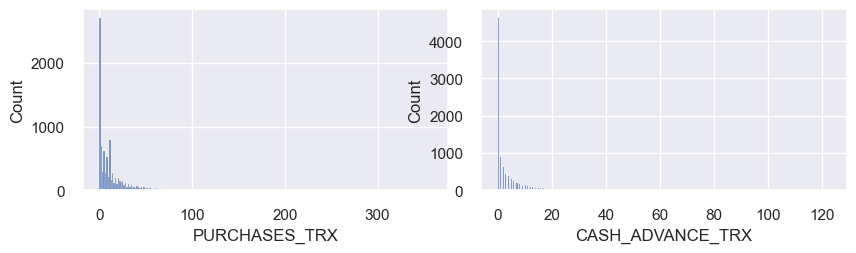

In [78]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = df,x = "PURCHASES_TRX",ax=ax1)
sns.histplot(data = df,x = "CASH_ADVANCE_TRX",ax=ax2)

<AxesSubplot: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

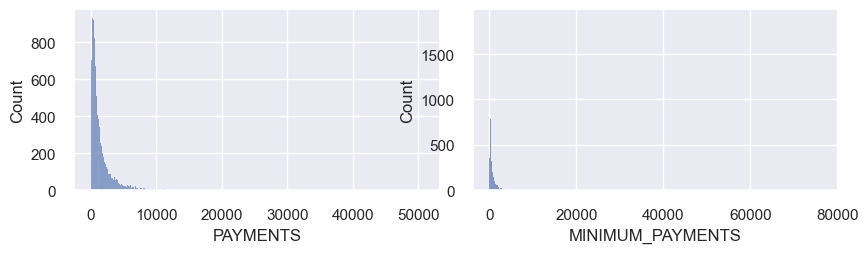

In [79]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = df,x = "PAYMENTS",ax=ax1)
sns.histplot(data = df,x = "MINIMUM_PAYMENTS",ax=ax2)

<AxesSubplot: xlabel='PRC_FULL_PAYMENT', ylabel='Count'>

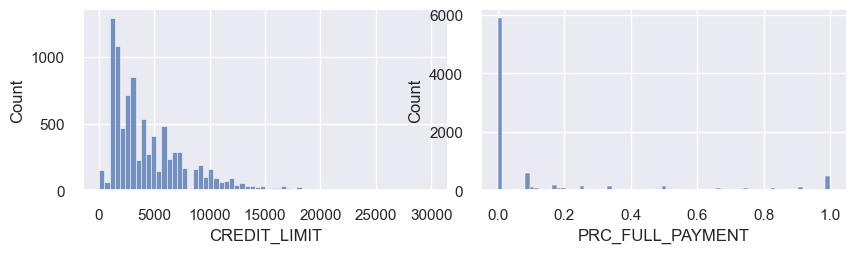

In [80]:
sns.set(rc={'figure.figsize':(15,8)})
ax1 = plt.subplot2grid(shape=(3,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid(shape=(3,6), loc=(0,2), colspan=2)
sns.set_theme(palette="viridis")
sns.histplot(data = df,x = "CREDIT_LIMIT",ax=ax1)
sns.histplot(data = df,x = "PRC_FULL_PAYMENT",ax=ax2)

<AxesSubplot: xlabel='TENURE', ylabel='Count'>

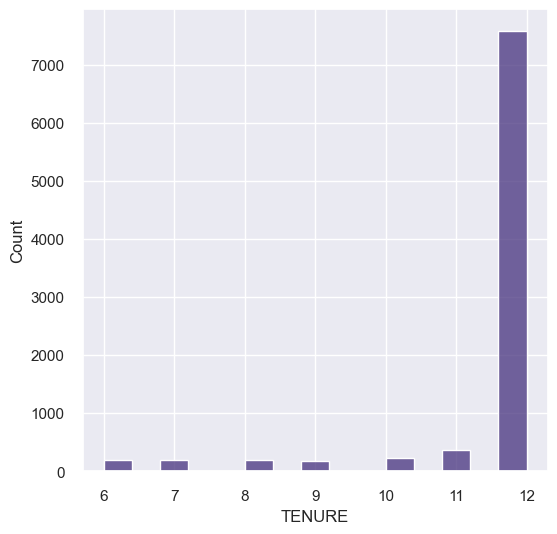

In [81]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(palette="viridis")
sns.histplot(data = df,x = "TENURE")

<AxesSubplot: xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

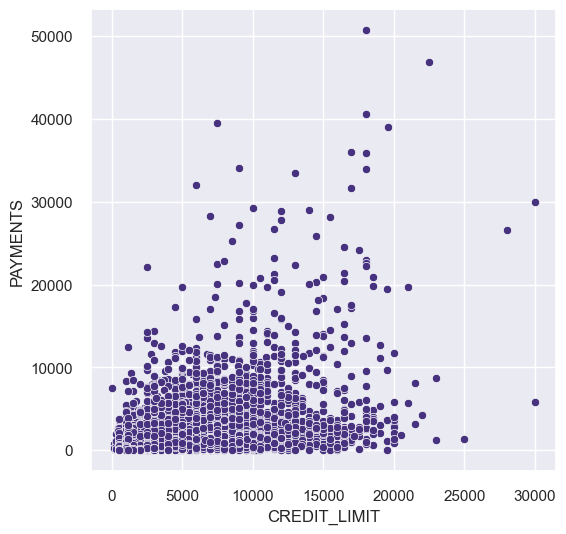

In [82]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(palette="viridis")
sns.scatterplot(x=df["CREDIT_LIMIT"],y=df["PAYMENTS"])

### K-Means Clustering

In [83]:
new_df = df.values

In [84]:
scaler = StandardScaler()

In [85]:
df2 = scaler.fit_transform(new_df)

In [86]:
kmeans = KMeans(random_state=42)

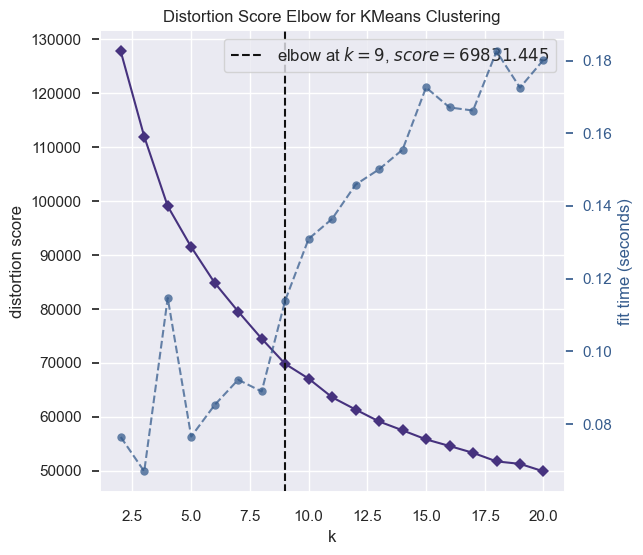

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
elbow_graph = KElbowVisualizer(KMeans(), k=20)
elbow_graph.fit(df2)
elbow_graph.show()

#### So the best cluster number is 8

In [88]:
kmeans = KMeans(n_clusters=8, random_state=42)
predictions = kmeans.fit_predict(df)

In [89]:
df2 = df.copy()

In [90]:
df2["Clusters"] = predictions

<AxesSubplot: xlabel='Clusters', ylabel='count'>

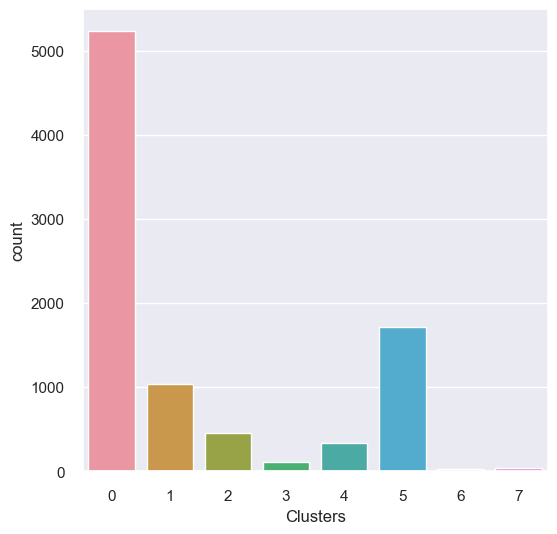

In [91]:
sns.countplot(x = df2["Clusters"])

##### Some clusters don't have much data in them because we didn't remove inconsistent data.

# Cluster Analysis

<AxesSubplot: xlabel='Clusters', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

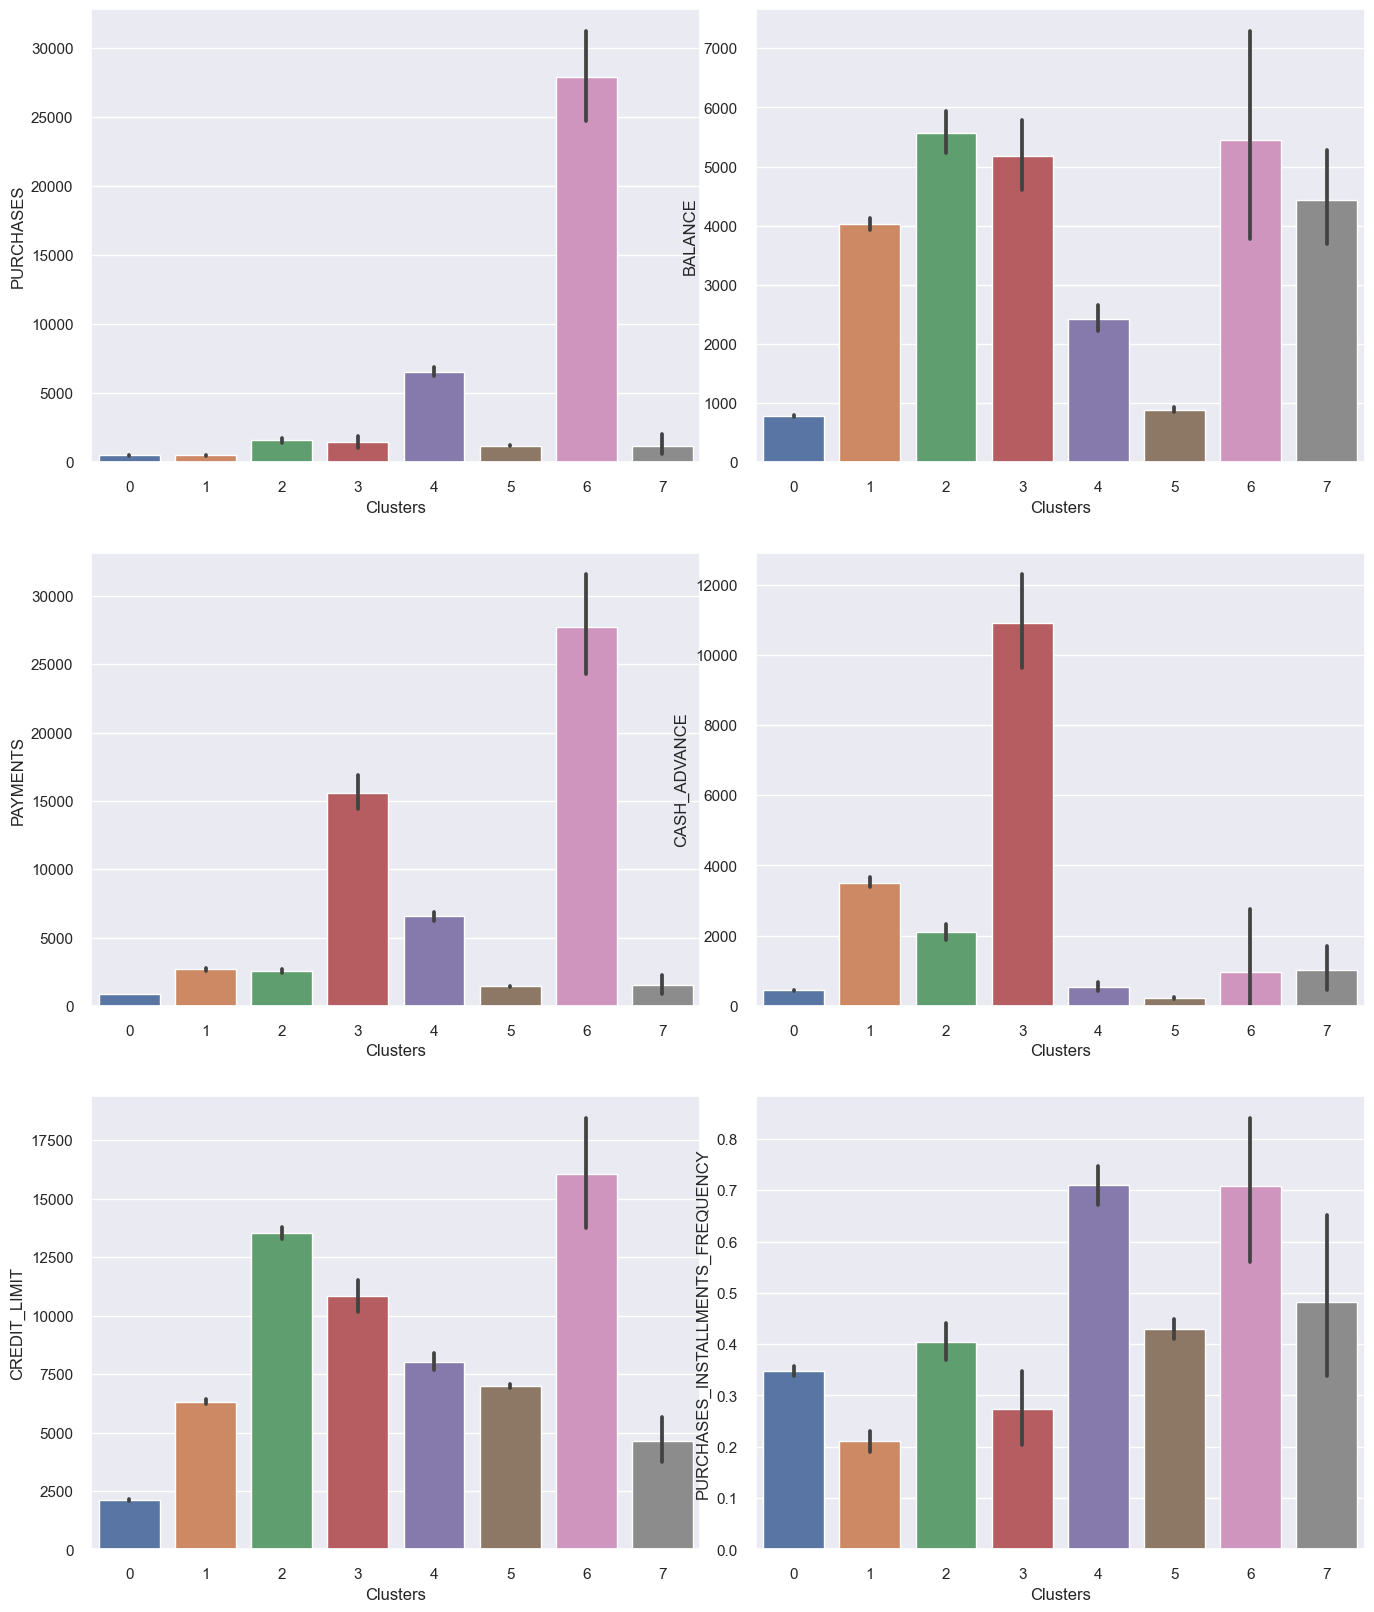

In [92]:
sns.set(rc={'figure.figsize':(25,20)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
ax3 = plt.subplot2grid((3,6), (1,1), colspan=2)
ax4 = plt.subplot2grid((3,6), (1,3), colspan=2)
ax5 = plt.subplot2grid((3,6), (2,1), colspan=2)
ax6 = plt.subplot2grid((3,6), (2,3), colspan=2)
sns.barplot(x=df2["Clusters"], y=df2["PURCHASES"], ax=ax1)
sns.barplot(x=df2["Clusters"], y=df2["BALANCE"], ax=ax2)
sns.barplot(x=df2["Clusters"], y=df2["PAYMENTS"], ax=ax3)
sns.barplot(x=df2["Clusters"], y=df2["CASH_ADVANCE"], ax=ax4)
sns.barplot(x=df2["Clusters"], y=df2["CREDIT_LIMIT"], ax=ax5)
sns.barplot(x=df2["Clusters"], y=df2["PURCHASES_INSTALLMENTS_FREQUENCY"], ax=ax6)

# Using PCA

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
x_principal = pca.fit_transform(df) 
x_principal = pd.DataFrame(x_principal) 
x_principal.columns = ['P1', 'P2'] 
  
x_principal

,P1,P2
0,-4326.383956,921.566884
1,4118.916676,-2432.846347
2,1497.907660,-1997.578692
3,1394.548556,-1488.743450
4,-3743.351874,757.342659
...,...,...
8945,-4208.357938,1122.443274
8946,-4123.924001,951.683803
8947,-4379.444202,911.504566
8948,-4791.117744,1032.540944


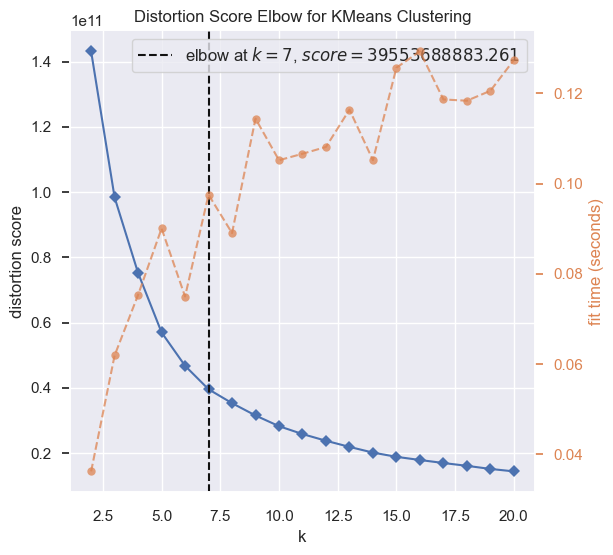

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
kmeans = KMeans(random_state=40)
sns.set(rc={'figure.figsize':(6,6)})
elbow_graph = KElbowVisualizer(KMeans(), k=20)
elbow_graph.fit(x_principal)
elbow_graph.show()

In [95]:
kmeans = KMeans(n_clusters=7, random_state=40)
predictions = kmeans.fit_predict(x_principal)
df2["Clusters_PCA"] = predictions

<AxesSubplot: xlabel='Clusters_PCA', ylabel='count'>

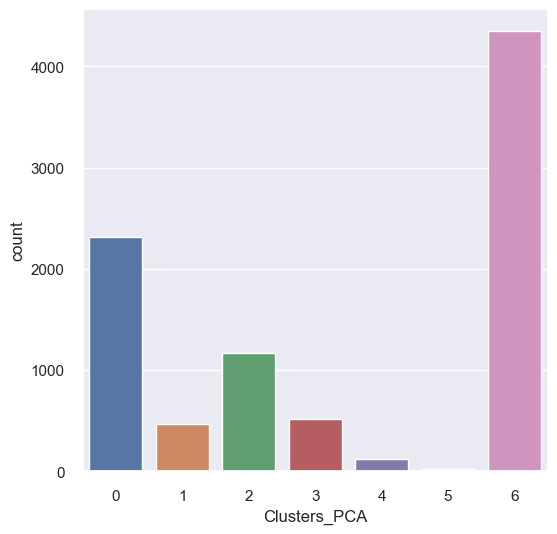

In [96]:
sns.countplot(x = df2["Clusters_PCA"])

<AxesSubplot: xlabel='Clusters_PCA', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

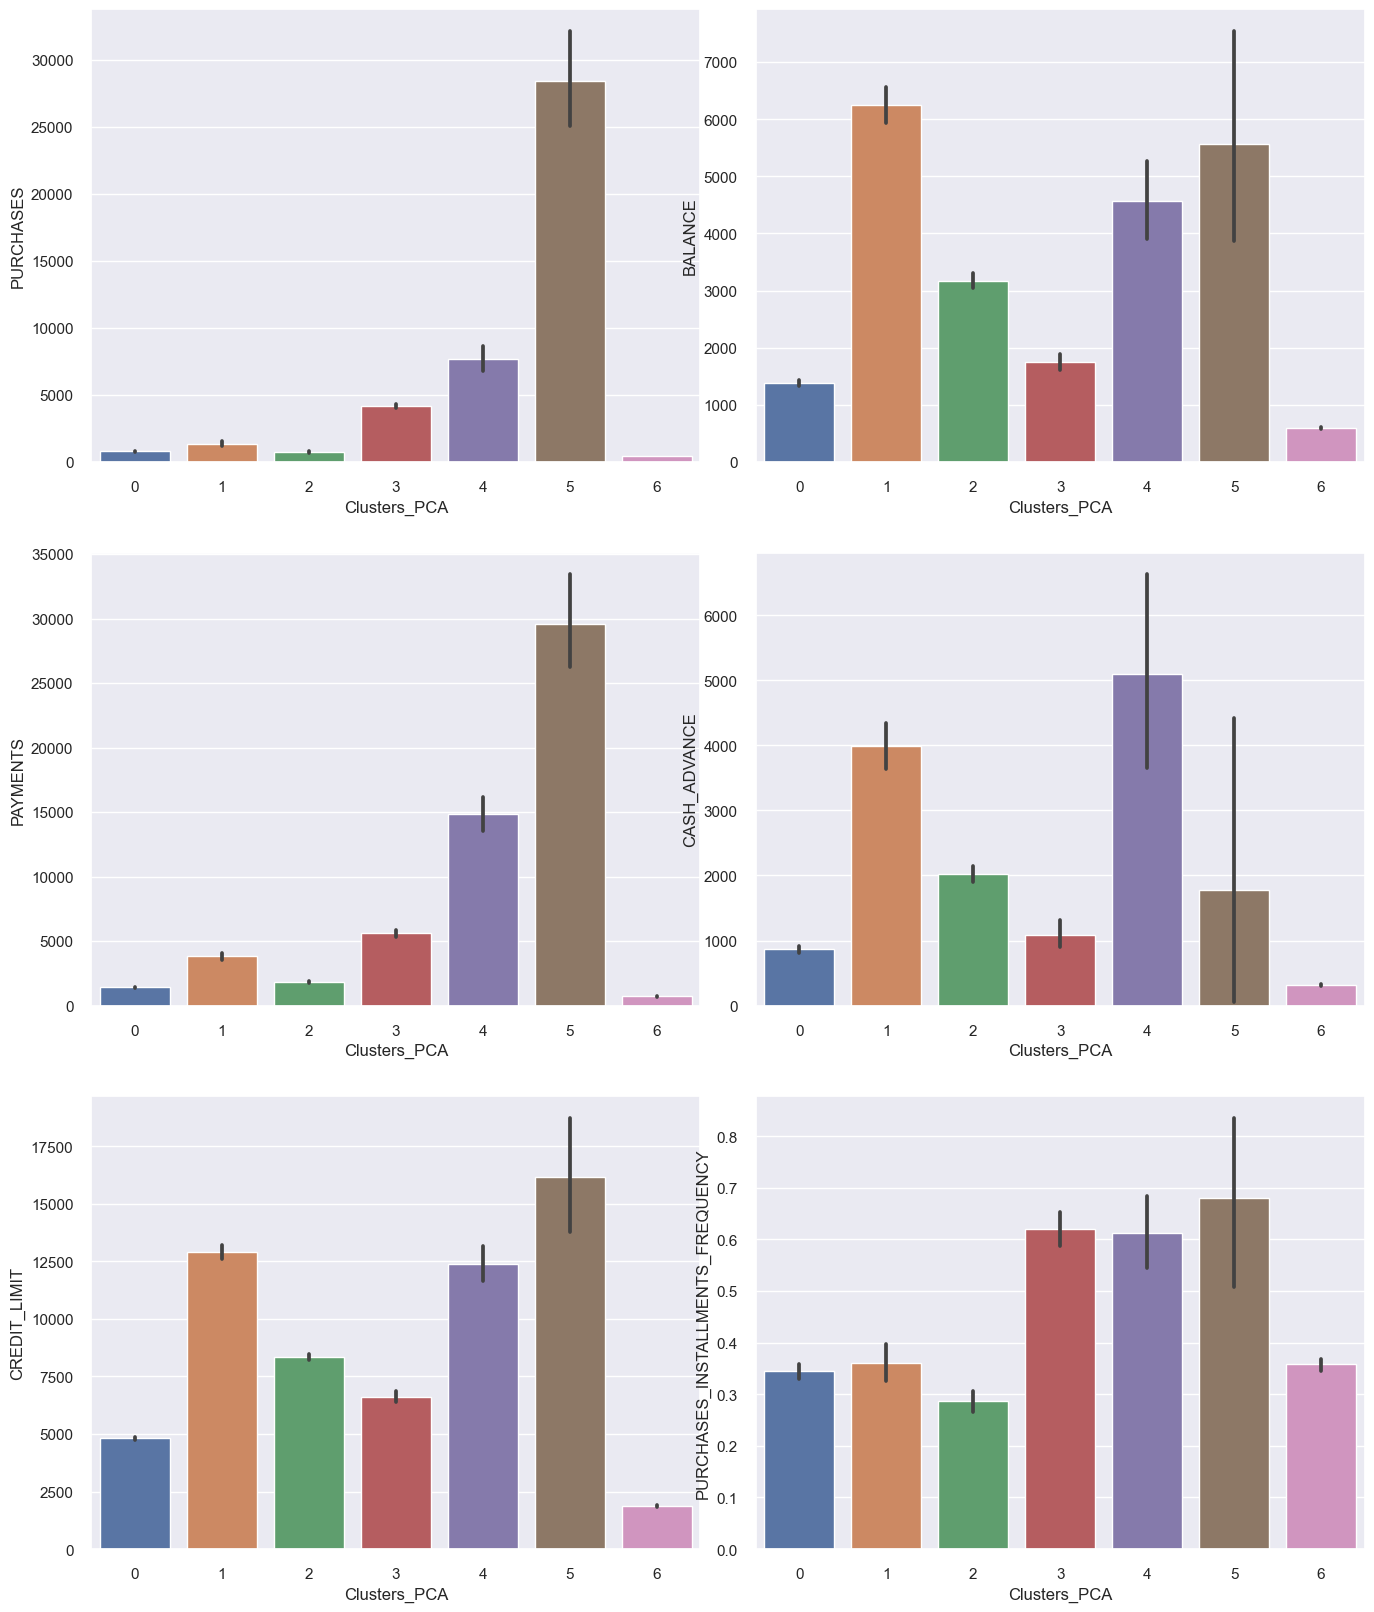

In [97]:
sns.set(rc={'figure.figsize':(25,20)})
ax1 = plt.subplot2grid((3,6), (0,1), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,3), colspan=2)
ax3 = plt.subplot2grid((3,6), (1,1), colspan=2)
ax4 = plt.subplot2grid((3,6), (1,3), colspan=2)
ax5 = plt.subplot2grid((3,6), (2,1), colspan=2)
ax6 = plt.subplot2grid((3,6), (2,3), colspan=2)
sns.barplot(x=df2["Clusters_PCA"], y=df2["PURCHASES"], ax=ax1)
sns.barplot(x=df2["Clusters_PCA"], y=df2["BALANCE"], ax=ax2)
sns.barplot(x=df2["Clusters_PCA"], y=df2["PAYMENTS"], ax=ax3)
sns.barplot(x=df2["Clusters_PCA"], y=df2["CASH_ADVANCE"], ax=ax4)
sns.barplot(x=df2["Clusters_PCA"], y=df2["CREDIT_LIMIT"], ax=ax5)
sns.barplot(x=df2["Clusters_PCA"], y=df2["PURCHASES_INSTALLMENTS_FREQUENCY"], ax=ax6)